# Exploratory Data Analysis in Python

--- 

## Contents

### [Chapter 1. Read, Clean and Validate](#section_ID_1)

### [Chapter 2. Distributions](#section_ID_2)

### [Chapter 3. Relationships](#section_ID_3)

### [Chapter 4. Multivariate Thinking](#section_ID_4)

--- 

<a id="section_ID_1"></a>


## 1. Read, Clean and Validate

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# to overcome the error Missing optional dependency 'tables'.  Use pip or conda to install tables.

# conda install pytables


In [87]:
# read the dataset from hdf5 file and assign to nsfg

nsfg = pd.read_hdf('nsfg.hdf5')

<div class="alert alert-block alert-warning">
<b>1.1 Exploring the NSFG data</b> 

</div>

##### <font color='navy'> Display the names of the rows and columns. </font>


In [89]:
# Display the number of rows and columns
nsfg.shape

(9358, 10)

- ##### <font color='navy'> Display the names of the columns in nsfg. </font>


In [90]:
nsfg.columns

Index(['caseid', 'outcome', 'birthwgt_lb1', 'birthwgt_oz1', 'prglngth',
       'nbrnaliv', 'agecon', 'agepreg', 'hpagelb', 'wgt2013_2015'],
      dtype='object')

- ##### <font color='navy'> Display the first 5 columns in nsfg. </font>


In [4]:
nsfg.head()

,caseid,outcome,birthwgt_lb1,birthwgt_oz1,prglngth,nbrnaliv,agecon,agepreg,hpagelb,wgt2013_2015
0,60418,1,5.0,4.0,40,1.0,2000,2075.0,22.0,3554.964843
1,60418,1,4.0,12.0,36,1.0,2291,2358.0,25.0,3554.964843
2,60418,1,5.0,4.0,36,1.0,3241,3308.0,52.0,3554.964843
3,60419,6,NaN,NaN,33,NaN,3650,NaN,NaN,2484.535358
4,60420,1,8.0,13.0,41,1.0,2191,2266.0,24.0,2903.782914


- ##### <font color='navy'> Select the column 'birthwgt_oz1' and assign it to a new variable called ounces. </font>


There are two ways of selecting the columns and the dot notation is easy because it saves time from typing whole name (press tab)

<div class="alert alert-block alert-info">
<b>External Resource : When to use bracket notation and when to use dot notation ?</b> 

    

    
 
    
https://www.dataschool.io/pandas-dot-notation-vs-brackets/    

</div>

In [91]:
ounces = nsfg['birthwgt_oz1']

ounces = nsfg.birthwgt_oz1


- ##### <font color='navy'> Display the first 5 elements of ounces. </font>


In [6]:
# Print the first 5 elements of ounces
print(ounces.head())

0     4.0
1    12.0
2     4.0
3     NaN
4    13.0
Name: birthwgt_oz1, dtype: float64


<div class="alert alert-block alert-warning">
<b>1.2 Validate a variable</b> 

</div>

- ##### <font color='navy'> How many pregnancies in this dataset ended with a live birth?</font>


In the NSFG dataset, the variable 'outcome' encodes the outcome of each pregnancy as shown below:

| Value      | Label |
| ----------- | ----------- |
| 1   | Live birth       |
| 2   | Induced abortion        |
| 3   | Still birth        |
| 4   | Misscarriage        |
| 5   | Ectopic pregnancy        |
| 6   | Current pregnancy        |



In [7]:
nsfg.outcome.value_counts().sort_index()

1    6489
2     947
3      86
4    1469
5     118
6     249
Name: outcome, dtype: int64

<div class="alert alert-block alert-success">
<b>Outcome : </b> The above code shows that there were 6489 live births !
</div>

<div class="alert alert-block alert-warning">
<b>1.3 Clean a variable</b> 

</div>

In the NSFG dataset, the variable 'nbrnaliv' records the number of babies born alive at the end of a pregnancy.

As shown below, if you use .value_counts() to view the responses, you'll see that the value 8 appears once, and if you consult the codebook, you'll see that this value indicates that the respondent refused to answer the question.

- ##### <font color='navy'> use .value_counts() to view the responses, you'll see that the value 8 appears once</font>


In [92]:
nsfg.nbrnaliv.value_counts()

1.0    6379
2.0     100
3.0       5
8.0       1
Name: nbrnaliv, dtype: int64

- ##### <font color='navy'> Your job in this exercise is to replace this value with np.nan.</font>


In [9]:
# Replace the value 8 with NaN
nsfg['nbrnaliv'].replace([8], np.nan, inplace=True)

In [10]:
# Replace the value 8 with NaN
nsfg.nbrnaliv.replace([8], np.nan, inplace=True)

- ##### <font color='navy'> Confirm that the value 8 no longer appears in this column by printing the values and their frequencies.</font>


In [11]:
# Print the values and their frequencies
print(nsfg['nbrnaliv'].value_counts())

1.0    6379
2.0     100
3.0       5
Name: nbrnaliv, dtype: int64


<div class="alert alert-block alert-success">
<b>Outcome : </b> The 8 has been replaced with nan values and nan values are not shown in .value_counts()
</div>

<div class="alert alert-block alert-warning">
<b>1.4 Compute a variable</b> 

</div>

For each pregnancy in the NSFG dataset, the variable 'agecon' encodes the respondent's age at conception, and 'agepreg' the respondent's age at the end of the pregnancy.

Both variables are recorded as integers with two implicit decimal places, so the value 2575 means that the respondent's age was 25.75.



- ##### <font color='navy'> Select 'agecon' and 'agepreg', divide them by 100, and assign them to the local variables agecon and agepreg.</font>


In [12]:
# Select the columns and divide by 100

agecon = nsfg.agecon / 100
agepreg = nsfg.agepreg / 100

- ##### <font color='navy'> Compute the difference, which is an estimate of the duration of the pregnancy. Keep in mind that for each pregnancy, agepreg will be larger than agecon.</font>


In [13]:
# Compute the difference
preg_length = agepreg - agecon

- ##### <font color='navy'> Use .describe() to compute the mean duration and other summary statistics. </font>


In [14]:
# Compute summary statistics
preg_length.describe()

count    9109.000000
mean        0.552069
std         0.271479
min         0.000000
25%         0.250000
50%         0.670000
75%         0.750000
max         0.920000
dtype: float64

<div class="alert alert-block alert-warning">
<b>1.5 Make a Histogram</b> 

</div>

Histograms are one of the most useful tools in exploratory data analysis. They quickly give you an overview of the distribution of a variable, that is, what values the variable can have, and how many times each value appears.

As we saw in a previous exercise, the NSFG dataset includes a variable 'agecon' that records age at conception for each pregnancy. 

Here, you're going to plot a histogram of this variable. 

- ##### <font color='navy'> Plot a histogram of agecon with 20 bins and set histtype to 'step'</font>


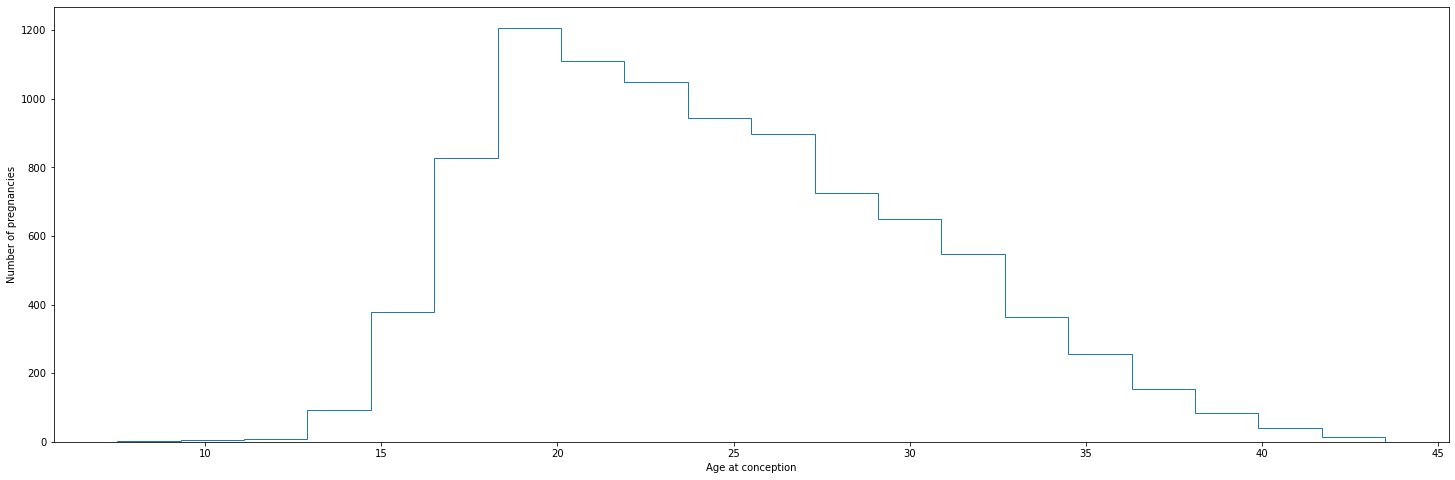

In [93]:
# Plot the histogram
plt.hist(agecon, bins=20, histtype='step')

# Label the axes
plt.xlabel('Age at conception')
plt.ylabel('Number of pregnancies')

# Show the figure
plt.show()

<div class="alert alert-block alert-success">
<b>Outcome : </b> Histogram with steps and bins=20
</div>

<div class="alert alert-block alert-warning">
<b>1.6 Compute Birth Weight</b> 

</div>

Now let's pull together the steps in this chapter to compute the average birth weight for full-term babies.

I've provided a function, resample_rows_weighted, that takes the NSFG data and resamples it using the sampling weights in wgt2013_2015. 

The result is a sample that is representative of the U.S. population.

Then I extract birthwgt_lb1 and birthwgt_oz1, replace special codes with NaN, and compute total birth weight in pounds, birth_weight.

<div class="alert alert-block alert-danger">
<b>To Understand : </b> this function resample_rows_weighted needs to be understood
</div>

In [16]:
def resample_rows_weighted(df, column='finalwgt', seed=17):
    """Resamples a DataFrame using probabilities proportional to given column.

    df: DataFrame
    column: string column name to use as weights

    returns: DataFrame
    """
    np.random.seed(seed)
    
    weights = df[column] / sum(df[column])
    
    indices = np.random.choice(df.index, len(df), replace=True, p=weights)
    
    sample = df.loc[indices]
    
    return sample

In [52]:
nsfg.head()

,caseid,outcome,birthwgt_lb1,birthwgt_oz1,prglngth,nbrnaliv,agecon,agepreg,hpagelb,wgt2013_2015
0,60418,1,5.0,4.0,40,1.0,2000,2075.0,22.0,3554.964843
1,60418,1,4.0,12.0,36,1.0,2291,2358.0,25.0,3554.964843
2,60418,1,5.0,4.0,36,1.0,3241,3308.0,52.0,3554.964843
3,60419,6,NaN,NaN,33,NaN,3650,NaN,NaN,2484.535358
4,60420,1,8.0,13.0,41,1.0,2191,2266.0,24.0,2903.782914


In [17]:
# Resample the data
nsfg = resample_rows_weighted(nsfg, 'wgt2013_2015')


In [18]:
# Clean the weight variables
pounds = nsfg['birthwgt_lb1'].replace([98, 99], np.nan)
ounces = nsfg['birthwgt_oz1'].replace([98, 99], np.nan)


In [19]:
# Compute total birth weight
birth_weight = pounds + ounces/16

--- 

- ##### <font color='navy'> Make a Boolean Series called full_term that is true for babies with 'prglngth' greater than or equal to 37 weeks.</font>


In [94]:
# Create a Boolean Series for full-term babies
full_term = nsfg.prglngth >= 37

In [95]:
full_term.head()

0     True
1    False
2    False
3    False
4     True
Name: prglngth, dtype: bool

- ##### <font color='navy'> Use full_term and birth_weight to select birth weight in pounds for full-term babies. Store the result in full_term_weight.
</font>


In [96]:
# Select the weights of full-term babies
full_term_weight = birth_weight[full_term]

In [97]:
full_term_weight.head()

4884    5.9375
1667    7.5625
633     7.3750
7347    7.5625
5331    8.8125
dtype: float64

- ##### <font color='navy'> Compute the mean weight of full-term babies.</font>


In [98]:
# Compute the mean weight of full-term babies
print(full_term_weight.mean())

7.392597951914515


<div class="alert alert-block alert-success">
<b>Outcome : </b> Mean weight of full term babies is taken here after the data has been resampled which needs to be understood ! There is no explanation of column 'wgt2013_2015' so maybe this needs reading the book in detail
</div>

<div class="alert alert-block alert-warning">
<b>1.7 Filter</b> 

</div>

In the previous exercise, you computed the mean birth weight for full-term babies; you filtered out preterm babies because their distribution of weight is different.

The distribution of weight is also different for multiple births, like twins and triplets. In this exercise, you'll filter them out, too, and see what effect it has on the mean.


- ##### <font color='navy'> Use the variable 'nbrnaliv' to make a Boolean Series that is True for single births (where 'nbrnaliv' equals 1) and False otherwise.

</font>


In [23]:
# Filter full-term babies
full_term = nsfg['prglngth'] >= 37

# Filter single births
single = nsfg['nbrnaliv'] == 1

- full_term is showing babies who were born in or after 37 weeks

- single is showing there was one baby born

In [24]:
full_term.head()

2707    False
4884     True
1667     True
633      True
7347     True
Name: prglngth, dtype: bool

In [25]:
single.head()

2707    False
4884     True
1667     True
633      True
7347     True
Name: nbrnaliv, dtype: bool

- ##### <font color='navy'> Use Boolean Series and logical operators to select single, full-term babies and compute their mean birth weight.

</font>


In [26]:
# Compute birth weight for single full-term babies
single_full_term_weight = birth_weight[full_term & single]
print('Single full-term mean:', single_full_term_weight.mean())


Single full-term mean: 7.40297320308299


In [27]:
single_full_term_weight.head()

4884    5.9375
1667    7.5625
633     7.3750
7347    7.5625
5331    8.8125
dtype: float64

- ##### <font color='navy'> For comparison, select multiple, full-term babies and compute their mean birth weight.

</font>


In [28]:
# Compute birth weight for multiple full-term babies
mult_full_term_weight = birth_weight[full_term & ~single]

print('Multiple full-term mean:', mult_full_term_weight.mean())

Multiple full-term mean: 5.784722222222222


<div class="alert alert-block alert-success">
<b>Outcome : </b> Two Boolean arrays were created; one for full length pregnancies i.e. >= 37 and another with one baby.  The mean was calculated for (full_length & onebaby and full_length + not(onebaby). It shows that the mean weight for one baby was 7.4 and for twins/triplets etc was 5.7
</div>

<a id="section_ID_2"></a>

## 2. Distributions

#### Background

In [3]:
gss=pd.read_hdf('gss.hdf5', 'gss')

In [4]:
gss.head()

,year,age,cohort,sex,race,educ,realinc,gunlaw,grass,wtssall
0,1972,26.0,1946.0,1,1,18.0,13537.0,2.0,NaN,0.8893
1,1972,38.0,1934.0,2,1,12.0,18951.0,1.0,NaN,0.4446
2,1972,57.0,1915.0,1,1,12.0,30458.0,1.0,NaN,1.3339
3,1972,61.0,1911.0,2,1,14.0,37226.0,1.0,NaN,0.8893
4,1972,59.0,1913.0,1,1,12.0,30458.0,2.0,NaN,0.8893


In [15]:
#pip install empiricaldist

In [7]:
from empiricaldist import Pmf
from empiricaldist import Cdf

In [23]:
# Demo notebook : https://nbviewer.org/github/AllenDowney/empiricaldist/blob/master/empiricaldist/dist_demo.ipynb

# this was the code used in the course, so the demo notebook has another code which would be used in the next row
# pmf_educ = Pmf(educ, normalize=False)


<div class="alert alert-block alert-warning">
<b>2.1 Make a PMF</b> 

</div>

The GSS dataset has been pre-loaded for you into a DataFrame called gss. You can explore it in the IPython Shell to get familiar with it.

In this exercise, you'll focus on one variable in this dataset, 'year', which represents the year each respondent was interviewed.

The Pmf class you saw in the video has already been created for you. You can access it outside of DataCamp via the empiricaldist library.


- ##### <font color='navy'> Make a PMF for year with normalize=False and display the result.

</font>


In [9]:
# Compute the PMF for year
pmf_year = Pmf.from_seq(gss.year, normalize=False)

# Print the result
print(pmf_year)

1972    1613
1973    1504
1974    1484
1975    1490
1976    1499
1977    1530
1978    1532
1980    1468
1982    1860
1983    1599
1984    1473
1985    1534
1986    1470
1987    1819
1988    1481
1989    1537
1990    1372
1991    1517
1993    1606
1994    2992
1996    2904
1998    2832
2000    2817
2002    2765
2004    2812
2006    4510
2008    2023
2010    2044
2012    1974
2014    2538
2016    2867
Name: , dtype: int64


In [19]:
# We can also do the above code with normalize=True
pmf_year_norm = Pmf.from_seq(gss.year, normalize=True)

# Print the result
print(pmf_year_norm[:10])

1972    0.025822
1973    0.024077
1974    0.023757
1975    0.023853
1976    0.023997
1977    0.024493
1978    0.024525
1980    0.023501
1982    0.029776
1983    0.025598
Name: , dtype: float64


In [18]:
pmf_year_perc = pmf_year_norm*100

pmf_year_perc[:10]

1972    2.582205
1973    2.407710
1974    2.375692
1975    2.385298
1976    2.399705
1977    2.449332
1978    2.452534
1980    2.350078
1982    2.977620
1983    2.559793
Name: , dtype: float64

Another way of looking is that 1972 has 2.58% of respondents etc !

<div class="alert alert-block alert-success">
<b>Outcome : </b> We can see the years and the number of respondants. For example, there were 1613 respondents which were interviewed in 1972 and 2867 respondents which were interviewed in 2016.
</div>

<div class="alert alert-block alert-warning">
<b>2.2 Plot a PMF</b> 

</div>

- ##### <font color='navy'> Select the 'age' column from the gss DataFrame and store the result in age.

</font>


In [20]:
# Select the age column
age = gss['age']


In [27]:
# to change the size of figures in matplotlib

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (25,12)

- ##### <font color='navy'> Make a normalized PMF of age. Store the result in pmf_age.

</font>


In [28]:
# Make a PMF of age
pmf_age = Pmf.from_seq(age, normalize=True)


- ##### <font color='navy'> Plot pmf_age as a bar chart.
</font>


The functions used here to make the bar chart is in the class of empiricaldist which is made by Allen B.Downey

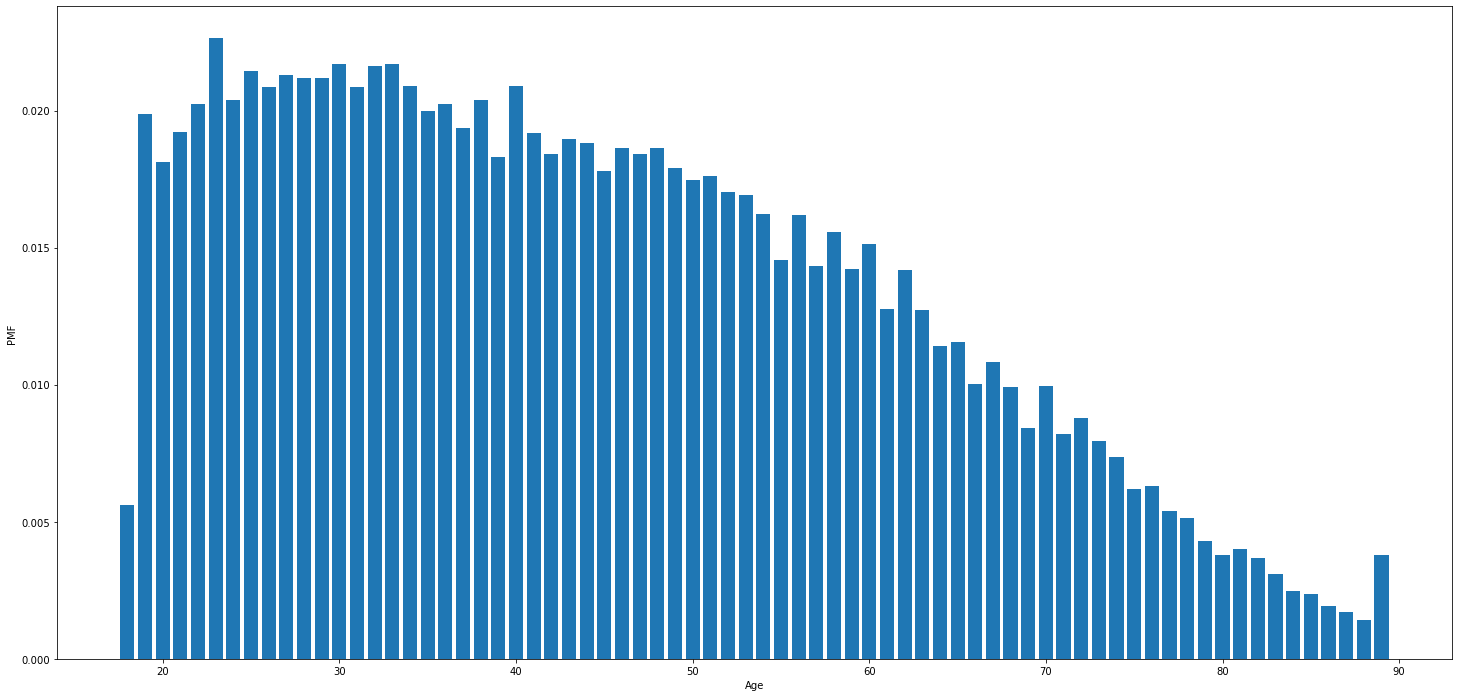

In [30]:
# Plot the PMF
pmf_age.bar(label='age')

# Label the axes
plt.xlabel('Age')
plt.ylabel('PMF')
plt.show()

<div class="alert alert-block alert-success">
<b>Outcome : </b> We have selected the age column, and then made pmf from it and displayed it using the car chart. The x axis shows the age and the y axis shows the fraction of that age in the dataset
</div>

---

<div class="alert alert-block alert-warning">
<b>2.3 Make a CDF</b> 

</div>

- ##### <font color='navy'> Select the 'age' column. Store the result in age.

</font>


In [31]:
# Select the age column
age = gss['age']

- ##### <font color='navy'> Compute the CDF of age. Store the result in cdf_age.


</font>


In [32]:
# Compute the CDF of age
cdf_age = Cdf.from_seq(age)


- ##### <font color='navy'> Calculate the CDF of 30.

</font>


In [33]:
# Calculate the CDF of 30
print(cdf_age(30))

0.2539137136526389


This code above shows that 25.39% of population is equal or below age of 30

- ##### <font color='navy'> What fraction of the respondents in the GSS are older than 30 ?

</font>


As there are 25.3% of population equal to or less than 30, there is approximately 75% of population which is older than 30 !

<div class="alert alert-block alert-success">
<b>Outcome : </b> We have made the CDF of age now which stands for cumulative distribution function.
</div>

<div class="alert alert-block alert-warning">
<b>2.4 Compute IQR
    </b> 

</div>

Recall from the video that the interquartile range (IQR) is the difference between the 75th and 25th percentiles. It is a measure of variability that is robust in the presence of errors or extreme values.

In this exercise, you'll compute the interquartile range of income in the GSS dataset. Income is stored in the 'realinc' column, and the CDF of income has already been computed and stored in cdf_income.

In [36]:
income = gss.realinc

In [37]:
cdf_income = Cdf.from_seq(income)

- ##### <font color='navy'> Calculate the 75th percentile of income and store it in percentile_75th.



</font>


In [43]:
# Calculate the 75th percentile
percentile_75th = cdf_income.inverse(0.75)

print(percentile_75th)

43426.0


- ##### <font color='navy'>Calculate the 25th percentile of income and store it in percentile_25th.





</font>


In [44]:
# Calculate the 25th percentile
percentile_25th = cdf_income.inverse(0.25)
print(percentile_25th)

13750.0


- ##### <font color='navy'> Calculate the interquartile range of income. Store the result in iqr.





</font>


In [41]:
# Calculate the interquartile range
iqr = percentile_75th - percentile_25th

# Print the interquartile range
print(iqr)

29676.0


- ##### <font color='navy'> Calculate the 75th percentile of income and store it in percentile_75th.



</font>


<div class="alert alert-block alert-warning">
<b>2.5 Plot a CDF
    </b> 

</div>

The distribution of income in almost every country is long-tailed; that is, there are a small number of people with very high incomes.

In the GSS dataset, the variable 'realinc' represents total household income, converted to 1986 dollars. We can get a sense of the shape of this distribution by plotting the CDF.

- ##### <font color='navy'> Select 'realinc' from the gss dataset.




</font>


In [45]:
# Select realinc
income = gss.realinc

- ##### <font color='navy'> Make a Cdf object called cdf_income.




</font>


In [48]:
# Make the CDF
cdf_income = Cdf.from_seq(income)


- ##### <font color='navy'> Create a plot of cdf_income using .plot().




</font>


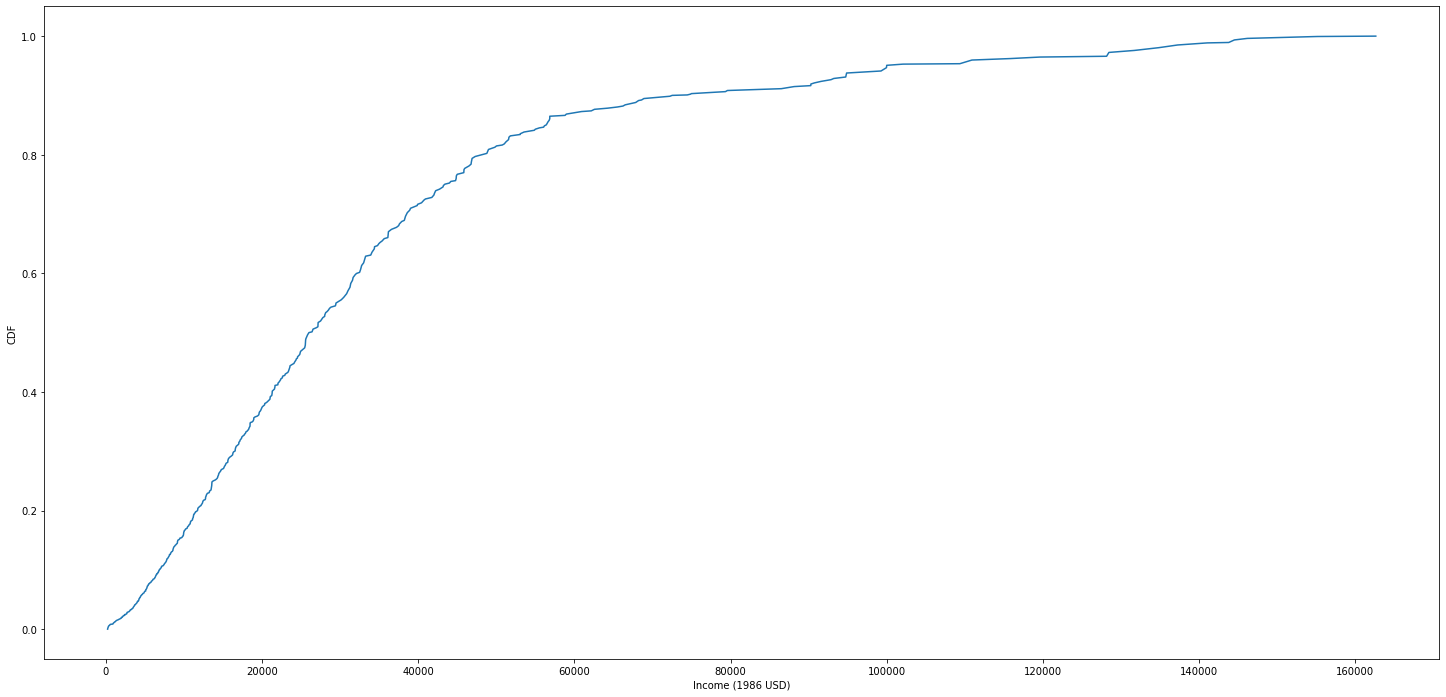

In [50]:
# Plot it using the empirical dist library
cdf_income.plot()

# Label the axes
plt.xlabel('Income (1986 USD)')
plt.ylabel('CDF')
plt.show()

<div class="alert alert-block alert-warning">
<b>2.6 Distribution of education
    </b> 

</div>

Let's begin comparing incomes for different levels of education in the GSS dataset, which has been pre-loaded for you into a DataFrame called gss. The variable educ represents the respondent's years of education.


- ##### <font color='navy'> What fraction of respondents report that they have 12 years of education or fewer?




</font>


In [51]:
gss.head()

,year,age,cohort,sex,race,educ,realinc,gunlaw,grass,wtssall
0,1972,26.0,1946.0,1,1,18.0,13537.0,2.0,NaN,0.8893
1,1972,38.0,1934.0,2,1,12.0,18951.0,1.0,NaN,0.4446
2,1972,57.0,1915.0,1,1,12.0,30458.0,1.0,NaN,1.3339
3,1972,61.0,1911.0,2,1,14.0,37226.0,1.0,NaN,0.8893
4,1972,59.0,1913.0,1,1,12.0,30458.0,2.0,NaN,0.8893


In [56]:
educ = gss.educ

In [57]:
cdf_educ = Cdf.from_seq(educ)

In [58]:
print(cdf_educ(12))

0.5322611710323575


<div class="alert alert-block alert-success">
<b>Outcome : </b> Approximately 53% of respondents have 12 years or fewer years of education
</div>

<div class="alert alert-block alert-warning">
<b>2.7 Extract education levels
    </b> 

</div>

Let's create Boolean Series to identify respondents with different levels of education.

In the U.S, 12 years of education usually means the respondent has completed high school (secondary education). A respondent with 14 years of education has probably completed an associate degree (two years of college); someone with 16 years has probably completed a bachelor's degree (four years of college).

- ##### <font color='navy'> Complete the line that identifies respondents with associate degrees, that is, people with 14 or more years of education but less than 16.
</font>

- ##### <font color='navy'> Complete the line that identifies respondents with 12 or fewer years of education.
</font>

- ##### <font color='navy'> Confirm that the mean of high is the fraction we computed in the previous exercise, about 53%.

</font>




In [59]:
# Select educ
educ = gss['educ']

# Bachelor's degree
bach = (educ >= 16)

# Associate degree
assc = (educ >=14) & (educ <16)

# High school (12 or fewer years of education)
high = (educ <= 12)

print(high.mean())

0.5308807991547402


<div class="alert alert-block alert-warning">
<b>2.8 Plot income CDFs
    </b> 

</div>

Let's now see what the distribution of income looks like for people with different education levels. You can do this by plotting the CDFs. 

Recall how Allen plotted the income CDFs of respondents interviewed before and after 1995:

Cdf(income[pre95]).plot(label='Before 1995')

Cdf(income[~pre95]).plot(label='After 1995')


Boolean Series was defined in the previous exercise, to identify respondents with different education levels: high, assc, and bach.

- ##### <font color='navy'> Fill in the missing lines of code to plot the CDFs.

</font>



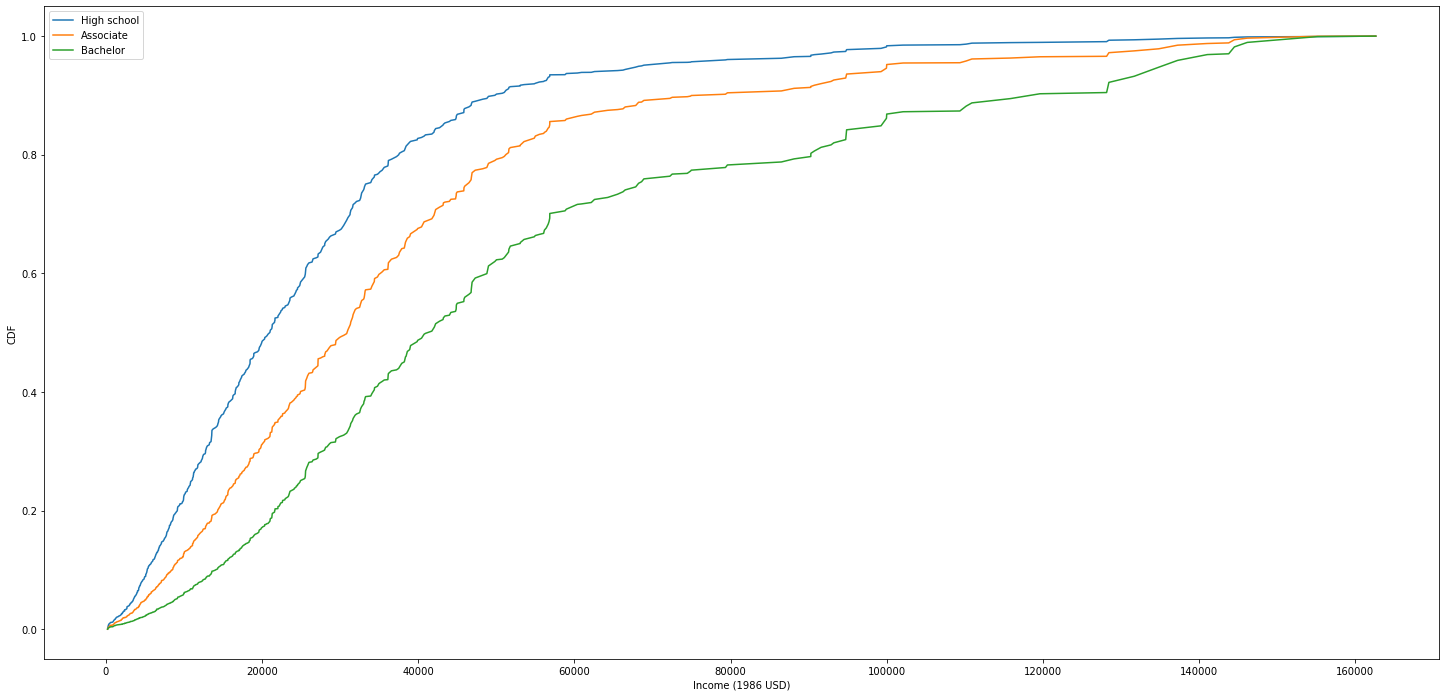

In [61]:
income = gss['realinc']

# Plot the CDFs
Cdf.from_seq(income[high]).plot(label='High school')
Cdf.from_seq(income[assc]).plot(label='Associate')
Cdf.from_seq(income[bach]).plot(label='Bachelor')

# Label the axes
plt.xlabel('Income (1986 USD)')
plt.ylabel('CDF')

plt.legend()
plt.show()


<div class="alert alert-block alert-warning">
<b>2.9 Distribution of income
</b> 

</div>

In many datasets, the distribution of income is approximately lognormal, which means that the logarithms of the incomes fit a normal distribution. We'll see whether that's true for the GSS data. As a first step, you'll compute the mean and standard deviation of the log of incomes using NumPy's np.log10() function.

Then, you'll use the computed mean and standard deviation to make a norm object using the scipy.stats.norm() function.

- ##### <font color='navy'> Extract 'realinc' from gss and compute its logarithm using np.log10( )


</font>



In [62]:
# Extract realinc and compute its log
income = gss['realinc']
log_income = np.log10(income)

- ##### <font color='navy'> Compute the mean and standard deviation of the result.



</font>



In [64]:
# Compute mean and standard deviation

mean = np.mean(log_income)
std = np.std(log_income)
print(mean, std)

4.371148677933652 0.4290043733010077


- ##### <font color='navy'> Make a norm object by passing the computed mean and standard deviation to norm().




</font>



In [77]:
# Make a norm object
from scipy.stats import norm

dist = norm(mean, std)

<div class="alert alert-block alert-warning">
<b>2.10 Comparing CDFs

</b> 

</div>

To see whether the distribution of income is well modeled by a lognormal distribution, we'll compare the CDF of the logarithm of the data to a normal distribution with the same mean and standard deviation. The variables from the previous exercise are available to use.

dist is a scipy.stats.norm object with the same mean and standard deviation as the data. It provides .cdf(), which evaluates the normal cumulative distribution function.

Be careful with capitalization: Cdf(), with an uppercase C, creates Cdf objects. dist.cdf(), with a lowercase c, evaluates the normal cumulative distribution function.



- ##### <font color='navy'> Evaluate the normal cumulative distribution function using dist.cdf.
</font>

- ##### <font color='navy'> Use the Cdf() function to compute the CDF of log_income.
</font>

- ##### <font color='navy'> Plot the result.
</font>




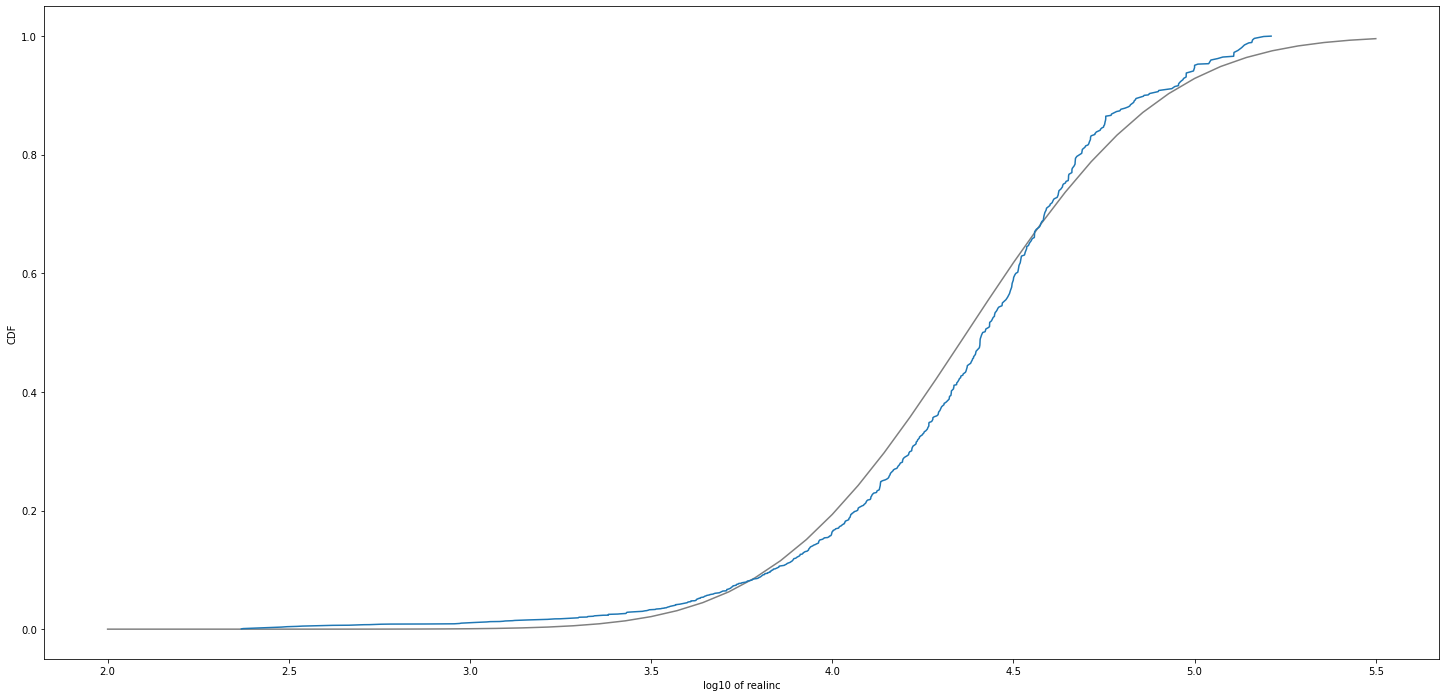

In [88]:
# Evaluate the model CDF
xs = np.linspace(2, 5.5)
ys = dist.cdf(xs)

# Plot the model CDF
plt.clf()
plt.plot(xs, ys, color='gray')

# Create and plot the Cdf of log_income
Cdf.from_seq(log_income).plot()
    
# Label the axes
plt.xlabel('log10 of realinc')
plt.ylabel('CDF')
plt.show()

<div class="alert alert-block alert-warning">
<b>2.11 Comparing PDFs

</b> 

</div>

In the previous exercise, we used CDFs to see if the distribution of income is lognormal. We can make the same comparison using a PDF and KDE. That's what you'll do in this exercise!

As before, the norm object dist is available in your workspace:

Just as all norm objects have a .cdf() method, they also have a .pdf() method.

To create a KDE plot, you can use Seaborn's kdeplot() function. 

- ##### <font color='navy'> Evaluate the normal PDF using dist, which is a norm object with the same mean and standard deviation as the data.

</font>

- ##### <font color='navy'>Make a KDE plot of the logarithms of the incomes, using log_income, which is a Series object.


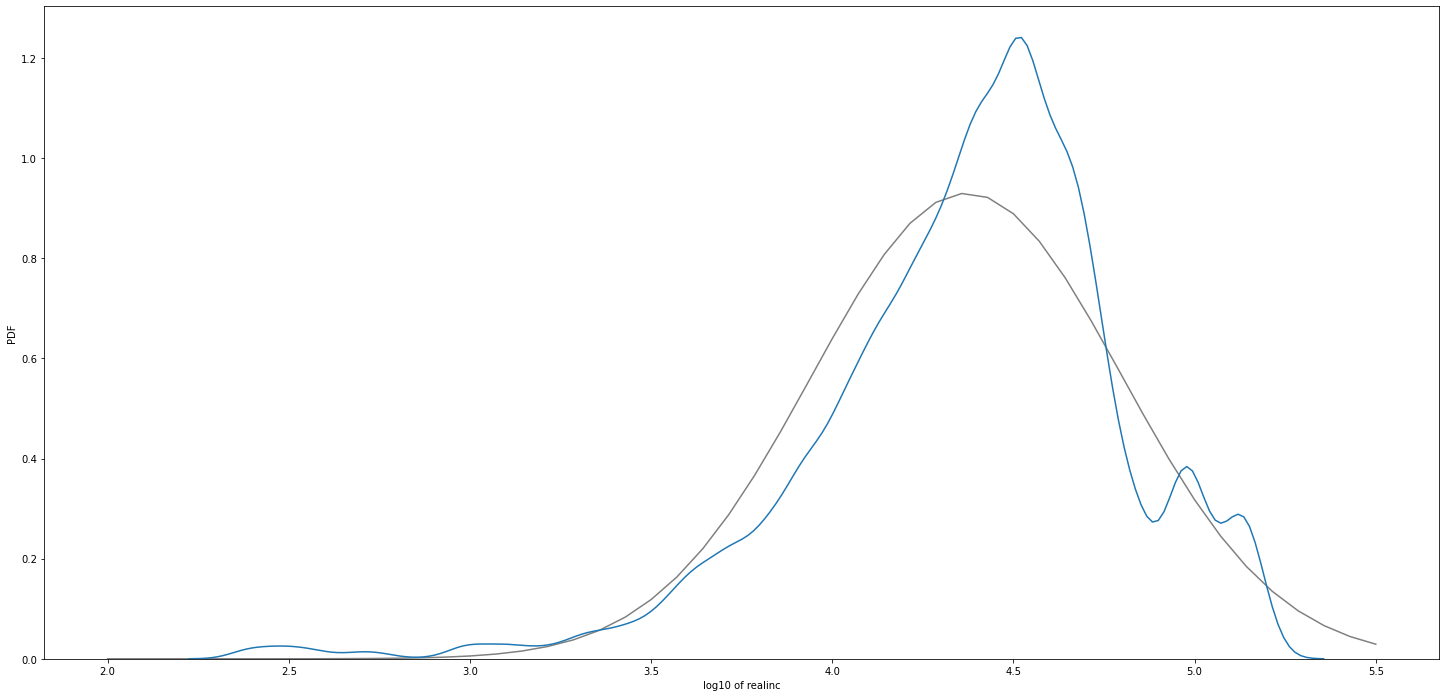

In [89]:
# Evaluate the normal PDF
xs = np.linspace(2, 5.5)
ys = dist.pdf(xs)


# Plot the model PDF
plt.clf()
plt.plot(xs, ys, color='gray')

# Plot the data KDE
sns.kdeplot(log_income)


# Label the axes
plt.xlabel('log10 of realinc')
plt.ylabel('PDF')
plt.show()


<a id="section_ID_3"></a>

## 3. Relationships

<div class="alert alert-block alert-warning">
<b>3.1 PMF of age

</b> 

</div>

Do people tend to gain weight as they get older? We can answer this question by visualizing the relationship between weight and age. But before we make a scatter plot, it is a good idea to visualize distributions one variable at a time. Here, you'll visualize age using a bar chart first. Recall that all PMF objects have a .bar() method to make a bar chart.

The BRFSS dataset includes a variable, 'AGE' (note the capitalization!), which represents each respondent's age. To protect respondents' privacy, ages are rounded off into 5-year bins. 'AGE' contains the midpoint of the bins.

- ##### <font color='navy'> Extract the variable 'AGE' from the DataFrame brfss and assign it to age.

</font>

- ##### <font color='navy'> Get the PMF of age and plot it as a bar chart.

</font>



In [96]:
brfss = pd.read_hdf("brfss.hdf5")

In [97]:
brfss.head()

,SEX,HTM4,WTKG3,INCOME2,_LLCPWT,_AGEG5YR,_VEGESU1,_HTMG10,AGE
96230,2.0,160.0,60.33,8.0,1398.525290,6.0,2.14,150.0,47.0
244920,2.0,163.0,58.97,5.0,84.057503,13.0,3.14,160.0,89.5
57312,2.0,163.0,72.57,8.0,390.248599,5.0,2.64,160.0,42.0
32573,2.0,165.0,74.84,1.0,11566.705300,3.0,1.46,160.0,32.0
355929,2.0,170.0,108.86,3.0,844.485450,3.0,1.81,160.0,32.0


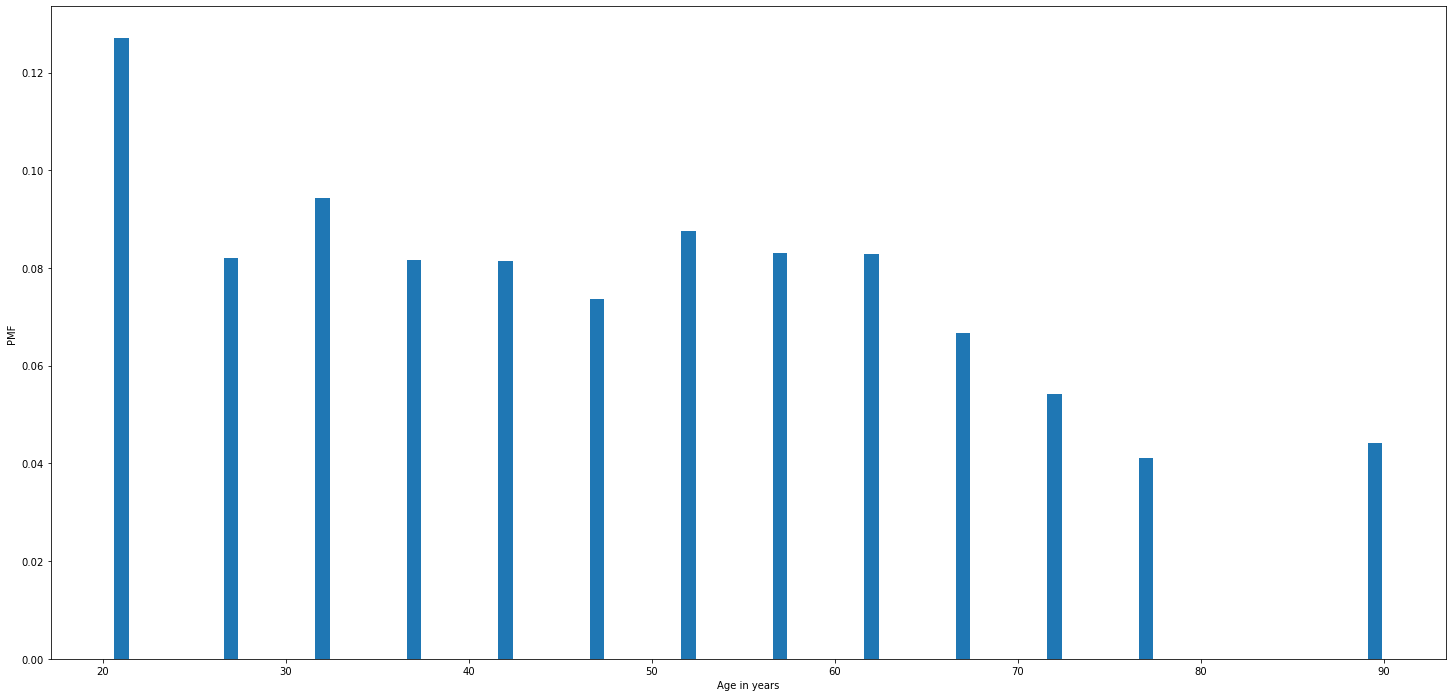

In [99]:
# Extract age
age = brfss.AGE

# Plot the PMF
pmf_age = Pmf.from_seq(age)
pmf_age.bar()

# Label the axes
plt.xlabel('Age in years')
plt.ylabel('PMF')
plt.show()

<div class="alert alert-block alert-warning">
<b>3.2 Scatter plot

</b> 

</div>

Now let's make a scatterplot of weight versus age. To make the code run faster, I've selected only the first 1000 rows from the brfss DataFrame.

Extract weight and age. 

Your job is to use plt.plot() to make a scatter plot.

- ##### <font color='navy'> Make a scatter plot of weight and age with format string 'o' and alpha=0.1.

</font>



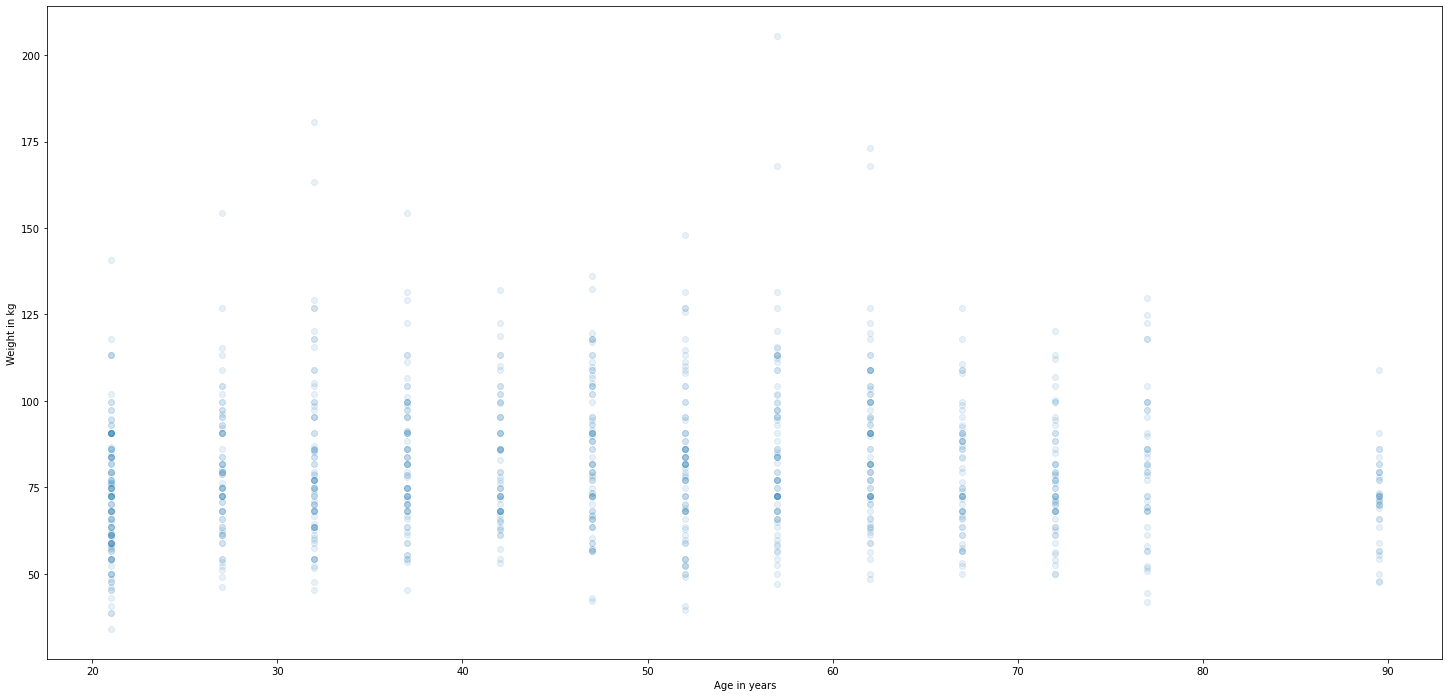

In [100]:
# Select the first 1000 respondents
brfss = brfss[:1000]

# Extract age and weight
age = brfss['AGE']
weight = brfss['WTKG3']

# Make a scatter plot
plt.plot(age, weight, 'o', alpha=0.1)


plt.xlabel('Age in years')
plt.ylabel('Weight in kg')

plt.show()

<div class="alert alert-block alert-warning">
<b>3.3 Jittering

</b> 

</div>

In the previous exercise, the ages fall in columns because they've been rounded into 5-year bins. If we jitter them, the scatter plot will show the relationship more clearly. Recall how Allen jittered height and weight in the video:

height_jitter = height + np.random.normal(0, 2, size=len(brfss))

weight_jitter = weight + np.random.normal(0, 2, size=len(brfss))

- ##### <font color='navy'> Add random noise to age with mean 0 and standard deviation 2.5.

</font>



In [101]:
# Select the first 1000 respondents

brfss = brfss[:1000]


# Add jittering to age

age = brfss['AGE'] + np.random.normal(0, 2.5,size=len(brfss))


- ##### <font color='navy'> Make a scatter plot between weight and age with marker size 5 and alpha=0.2. Be sure to also specify 'o'.

</font>



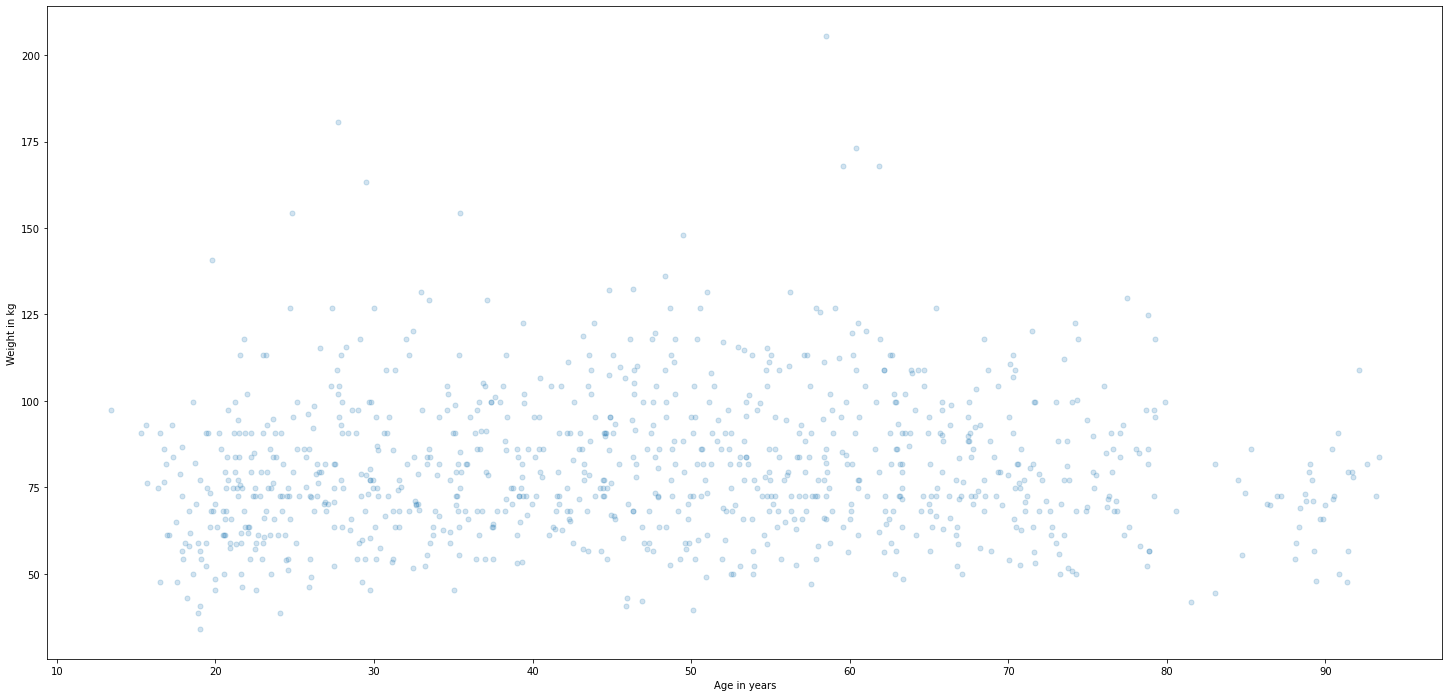

In [102]:
# Extract weight
weight = brfss['WTKG3']

# Make a scatter plot
plt.plot(age, weight, 'o',markersize=5, alpha=0.2 )

plt.xlabel('Age in years')
plt.ylabel('Weight in kg')
plt.show()

<div class="alert alert-block alert-warning">
<b>3.4 Height and Weight

</b> 

</div>

Previously we looked at a scatter plot of height and weight, and saw that taller people tend to be heavier. Now let's take a closer look using a box plot. The brfss DataFrame contains a variable '_HTMG10' that represents height in centimeters, binned into 10 cm groups.

Recall how Allen created the box plot of 'AGE' and 'WTKG3' in the video, with the y-axis on a logarithmic scale:

sns.boxplot(x='AGE', y='WTKG3', data=data, whis=10)

plt.yscale('log')

- ##### <font color='navy'> Fill in the parameters of .boxplot() to plot the distribution of weight ('WTKG3') in each height ('_HTMG10') group. Specify whis=10, just as was done in the video.

</font>


- ##### <font color='navy'> Add a line to plot the y-axis on a logarithmic scale.

</font>



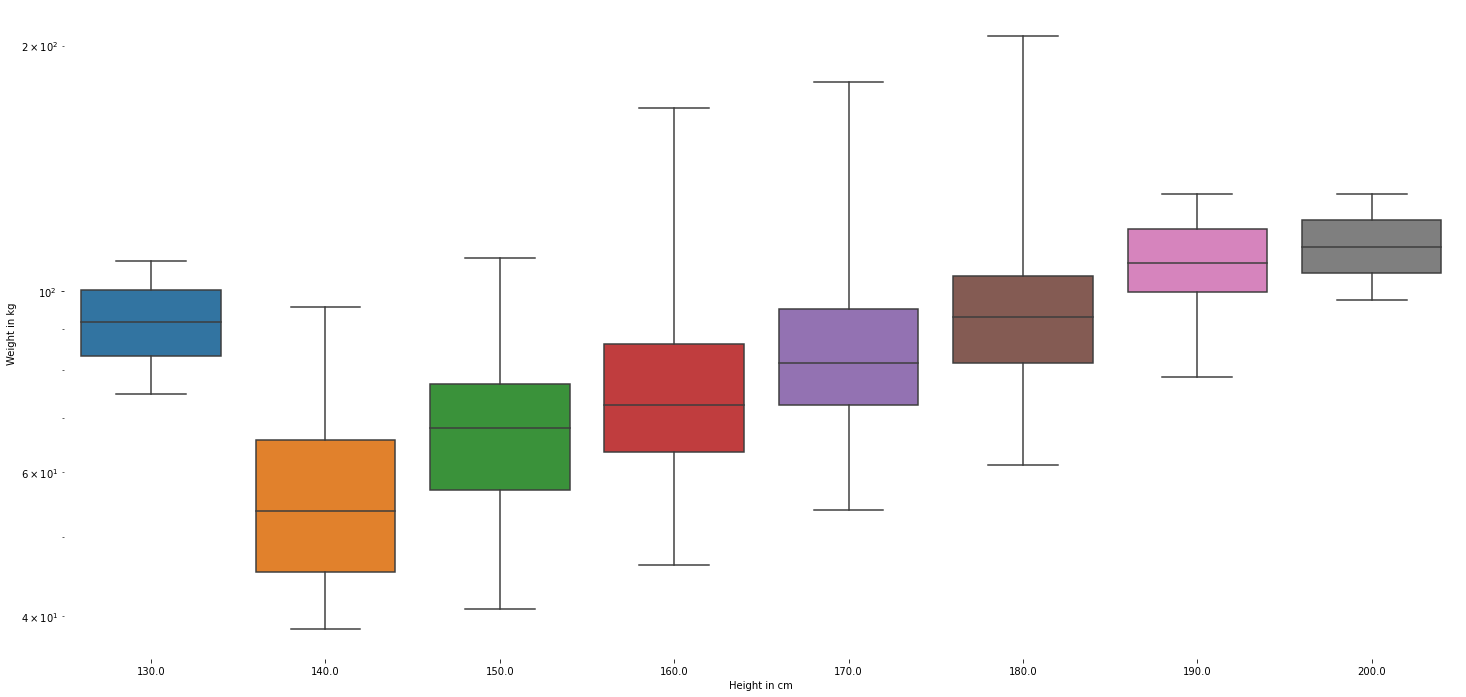

In [105]:
# Drop rows with missing data
data = brfss.dropna(subset=['_HTMG10', 'WTKG3'])

# Make a box plot
sns.boxplot(x='_HTMG10', y='WTKG3', data=data, whis=10)

# Plot the y-axis on a log scale
plt.yscale('log')

# Remove unneeded lines and label axes
sns.despine(left=True, bottom=True)
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.show()



<div class="alert alert-block alert-warning">
<b>3.5 Distribution of income


</b> 

</div>

In the next two exercises we'll look at relationships between income and other variables. In the BRFSS, income is represented as a categorical variable; that is, respondents are assigned to one of 8 income categories. The variable name is 'INCOME2'. Before we connect income with anything else, let's look at the distribution by computing the PMF. Recall that all Pmf objects have a .bar() method.



- ##### <font color='navy'> Extract 'INCOME2' from the brfss DataFrame and assign it to income.

</font>


- ##### <font color='navy'> Plot the PMF of income as a bar chart.



</font>



In [107]:
brfss.columns

Index(['SEX', 'HTM4', 'WTKG3', 'INCOME2', '_LLCPWT', '_AGEG5YR', '_VEGESU1',
       '_HTMG10', 'AGE'],
      dtype='object')

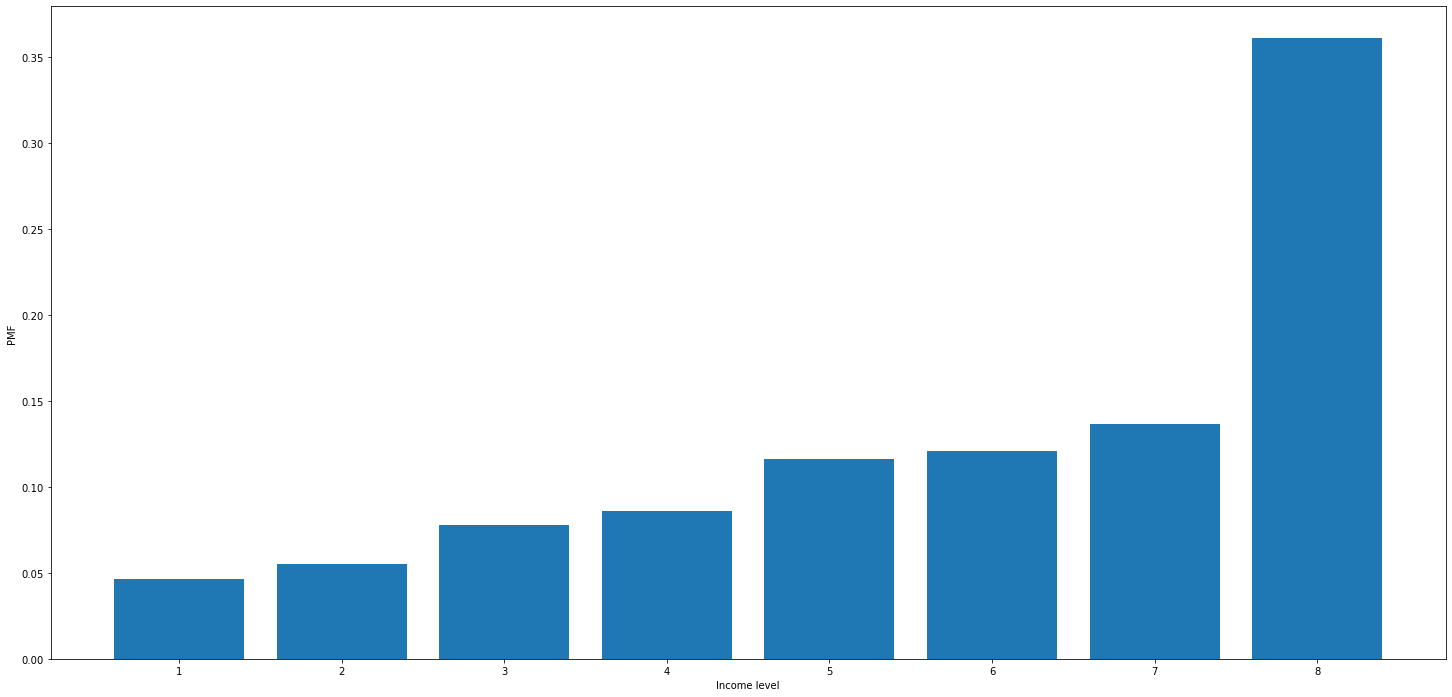

In [109]:
# Extract income
income = brfss.INCOME2

# Plot the PMF
income_pmf = Pmf.from_seq(income)
income_pmf.bar()

# Label the axes
plt.xlabel('Income level')
plt.ylabel('PMF')
plt.show()

<div class="alert alert-block alert-warning">
<b>3.6 Income and height


</b> 

</div>

- ##### <font color='navy'> Create a violin plot to plot the distribution of height ('HTM4') in each income ('INCOME2') group. Specify inner=None to simplify the plot.

</font>



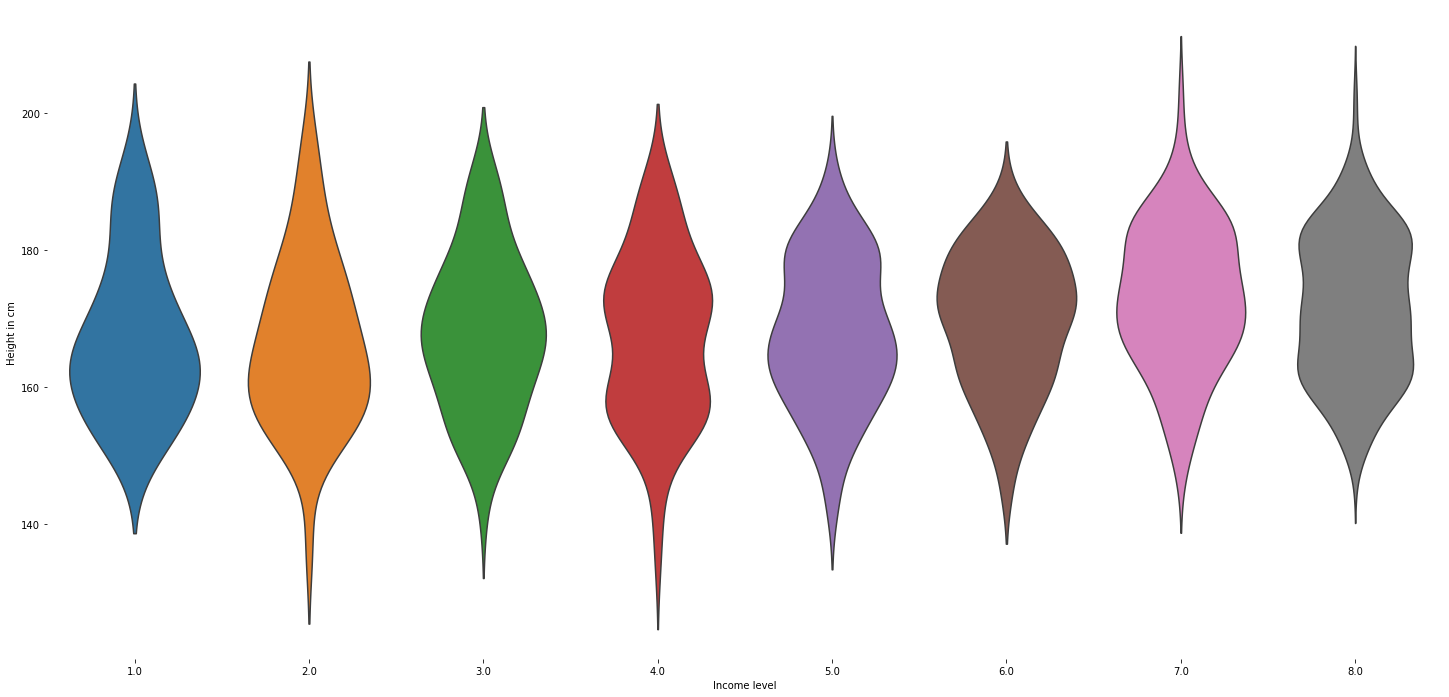

In [110]:
# Drop rows with missing data
data = brfss.dropna(subset=['INCOME2', 'HTM4'])

# Make a violin plot
sns.violinplot(x='INCOME2', y='HTM4', data=data, inner=None)

# Remove unneeded lines and label axes
sns.despine(left=True, bottom=True)
plt.xlabel('Income level')
plt.ylabel('Height in cm')
plt.show()


<div class="alert alert-block alert-warning">
<b>3.7 Computing corelations


</b> 

</div>

The purpose of the BRFSS is to explore health risk factors, so it includes questions about diet. The variable '_VEGESU1' represents the number of servings of vegetables respondents reported eating per day.

Let's see how this variable relates to age and income.

- ##### <font color='navy'> From the brfss DataFrame, select the columns 'AGE', 'INCOME2', and '_VEGESU1'.

</font>

- ##### <font color='navy'> Compute the correlation matrix for these variables.

</font>





In [111]:
# Select columns
columns = ['AGE', 'INCOME2', '_VEGESU1' ]
subset = brfss[columns]

# Compute the correlation matrix
print(subset.corr())

               AGE   INCOME2  _VEGESU1
AGE       1.000000 -0.014141 -0.021548
INCOME2  -0.014141  1.000000  0.115264
_VEGESU1 -0.021548  0.115264  1.000000


<div class="alert alert-block alert-warning">
<b>3.8 Interpreting correlations



</b> 

</div>

In the previous exercise, the correlation between income and vegetable consumption is about 0.12. The correlation between age and vegetable consumption is about -0.01.

Which of the following are correct interpretations of these results ?

- ##### <font color='navy'> A: People with higher incomes eat more vegetables.

</font>

- ##### <font color='navy'> B: The relationship between income and vegetable consumption is linear.


</font>


- ##### <font color='navy'> C: Older people eat more vegetables.



</font>


- ##### <font color='navy'> D: There could be a strong nonlinear relationship between age and vegetable consumption.



</font>





<div class="alert alert-block alert-success">
<b>Ans: </b> A and D
</div>

<div class="alert alert-block alert-warning">
<b>3.9 Income and vegetables




</b> 

</div>

As we saw in a previous exercise, the variable '_VEGESU1' represents the number of vegetable servings respondents reported eating per day.

Let's estimate the slope of the relationship between vegetable consumption and income.

- ##### <font color='navy'> Extract the columns 'INCOME2' and '_VEGESU1' from subset into xs and ys respectively.

</font>

- ##### <font color='navy'> Extract the columns 'INCOME2' and '_VEGESU1' from subset into xs and ys respectively.


</font>



In [112]:
from scipy.stats import linregress

# Extract the variables
subset = brfss.dropna(subset=['INCOME2', '_VEGESU1'])
xs = subset['INCOME2']
ys = subset['_VEGESU1']

# Compute the linear regression
res = linregress(xs, ys)
print(res)

LinregressResult(slope=0.07000027412424817, intercept=1.5413758521321232, rvalue=0.11526352353306703, pvalue=0.0015115444024927935, stderr=0.021983967667553426, intercept_stderr=0.1391883671176333)


<div class="alert alert-block alert-warning">
<b>3.10 Fit a line




</b> 

</div>

Continuing from the previous exercise:

- Assume that xs and ys contain income codes and daily vegetable consumption, respectively, and

- res contains the results of a simple linear regression of ys onto xs.

Now, you're going to compute the line of best fit. NumPy has been imported for you as np.

- ##### <font color='navy'> Set fx to the minimum and maximum of xs, stored in a NumPy array.

- ##### <font color='navy'> Set fy to the points on the fitted line that correspond to the fx.


</font>



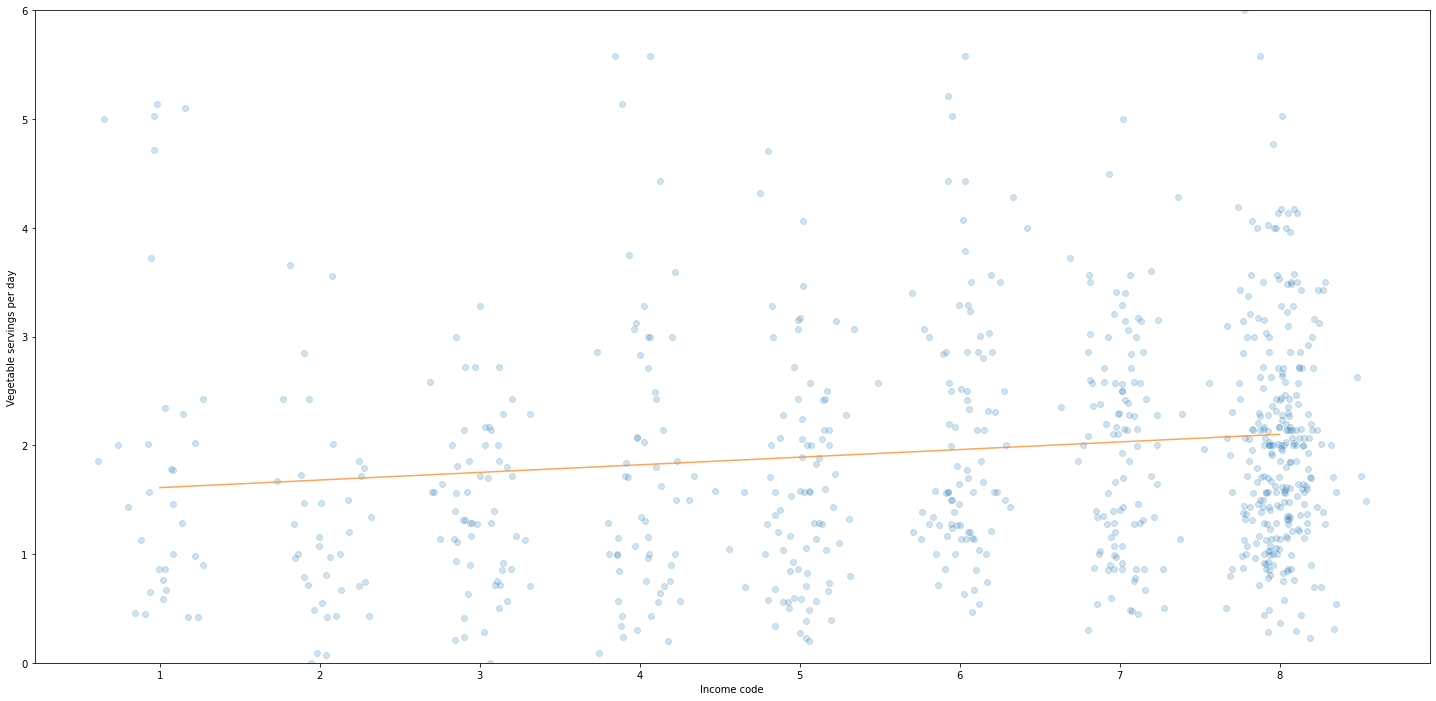

In [119]:
# Plot the scatter plot
plt.clf()

# If you dont want the jitter but it looks like columns
#plt.plot(xs, ys, 'o', alpha=0.2)

x_jitter = xs + np.random.normal(0, 0.15, len(xs))
plt.plot(x_jitter, ys, 'o', alpha=0.2)


# Plot the line of best fit
fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope * fx
plt.plot(fx, fy, '-', alpha=0.7)

plt.xlabel('Income code')
plt.ylabel('Vegetable servings per day')
plt.ylim([0, 6])
plt.show()

<a id="section_ID_4"></a>

## 4. Multivariate Thinking

<div class="alert alert-block alert-warning">
<b>4.1 Using StatsModels





</b> 

</div>

Let's run the same regression using SciPy and StatsModels, and confirm we get the same results.



- ##### <font color='navy'> Compute the regression of '_VEGESU1' as a function of 'INCOME2' using SciPy's linregress().


- ##### <font color='navy'> Compute the regression of '_VEGESU1' as a function of 'INCOME2' using StatsModels' smf.ols().




</font>



In [126]:
from scipy.stats import linregress
import statsmodels.formula.api as smf

# Run regression with linregress
subset = brfss.dropna(subset=['INCOME2', '_VEGESU1'])
xs = subset['INCOME2']
ys = subset['_VEGESU1']
res = linregress(xs, ys)
print(res)

print("------------------------------")



# Run regression with StatsModels
results = smf.ols('_VEGESU1 ~ INCOME2', data=brfss).fit()
print(results.params)

LinregressResult(slope=0.07000027412424817, intercept=1.5413758521321232, rvalue=0.11526352353306703, pvalue=0.0015115444024927935, stderr=0.021983967667553426, intercept_stderr=0.1391883671176333)
------------------------------
Intercept    1.541376
INCOME2      0.070000
dtype: float64


<div class="alert alert-block alert-warning">
<b>4.2 Plot income and education
   





</b> 

</div>

To get a closer look at the relationship between income and education, let's use the variable 'educ' to group the data, then plot mean income in each group.

Here, the GSS dataset has been pre-loaded into a DataFrame called gss.

- ##### <font color='navy'> Group gss by 'educ'. Store the result in grouped.

</font>



In [129]:
# Group by educ
grouped = gss.groupby("educ")


- ##### <font color='navy'> From grouped, extraxt 'realinc' and compute the mean

</font>



In [132]:
# Compute mean income in each group
mean_income_by_educ = grouped['realinc'].mean()


- ##### <font color='navy'> Plot mean_income_by_educ as a scatter plot. Specify 'o' and alpha=0.5.

</font>



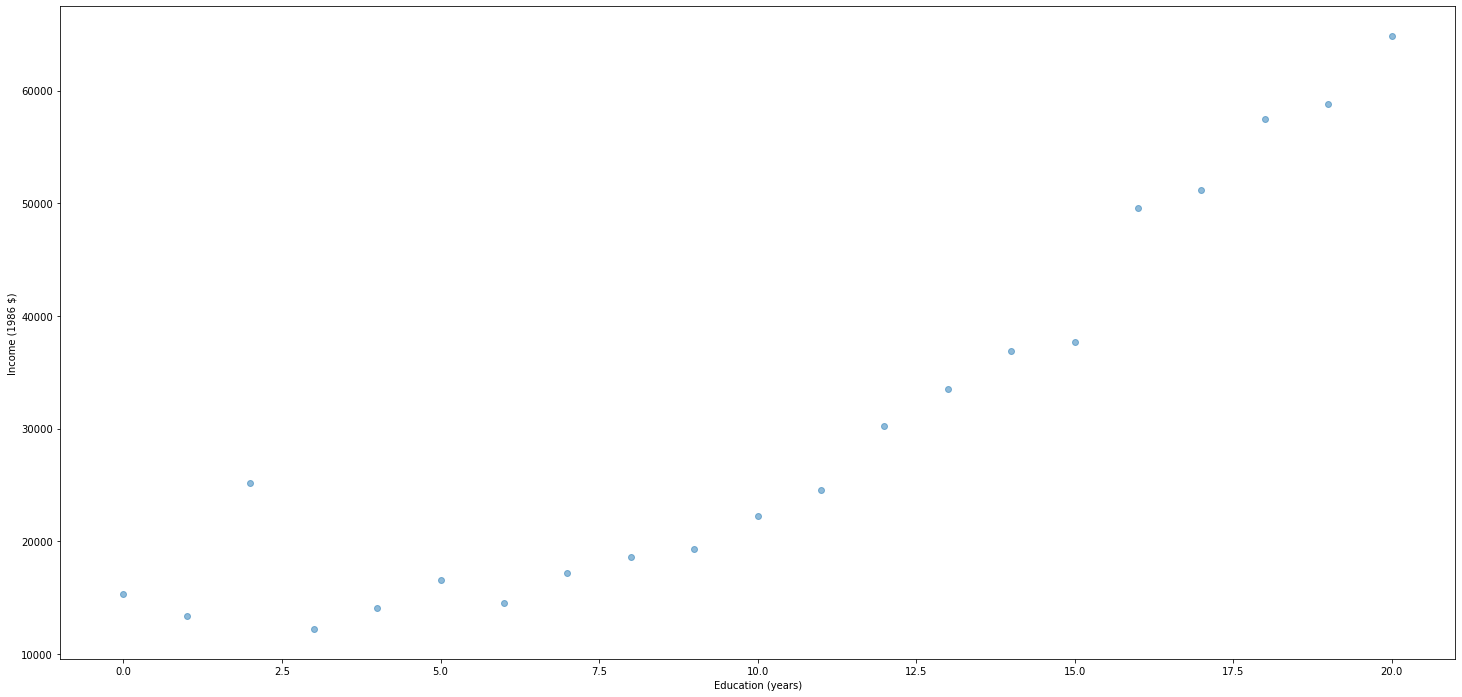

In [136]:
# Plot mean income as a scatter plot
plt.clf()
plt.plot(mean_income_by_educ, 'o', alpha=0.5)

# Label the axes
plt.xlabel('Education (years)')
plt.ylabel('Income (1986 $)')
plt.show()

<div class="alert alert-block alert-warning">
<b>4.3 Non-linear model of education

   





</b> 

</div>

The graph in the previous exercise suggests that the relationship between income and education is non-linear. So let's try fitting a non-linear model.


- ##### <font color='navy'> Add a column named 'educ2' to the gss DataFrame; it should contain the values from 'educ' squared.

</font>



In [137]:
import statsmodels.formula.api as smf

# Add a new column with educ squared
gss['educ2'] = gss.educ**2

In [140]:
# Add a new column with age squared
gss['age2'] = gss.age**2

- ##### <font color='navy'> Run a regression model that uses 'educ', 'educ2', 'age', and 'age2' to predict 'realinc'.
</font>



In [141]:
gss.head()

,year,age,cohort,sex,race,educ,realinc,gunlaw,grass,wtssall,educ2,age2
0,1972,26.0,1946.0,1,1,18.0,13537.0,2.0,NaN,0.8893,324.0,676.0
1,1972,38.0,1934.0,2,1,12.0,18951.0,1.0,NaN,0.4446,144.0,1444.0
2,1972,57.0,1915.0,1,1,12.0,30458.0,1.0,NaN,1.3339,144.0,3249.0
3,1972,61.0,1911.0,2,1,14.0,37226.0,1.0,NaN,0.8893,196.0,3721.0
4,1972,59.0,1913.0,1,1,12.0,30458.0,2.0,NaN,0.8893,144.0,3481.0


In [142]:
# Run a regression model with educ, educ2, age, and age2
results = smf.ols('realinc ~ educ + educ2 + age + age2', data=gss).fit()

# Print the estimated parameters
print(results.params)

Intercept   -23241.884034
educ          -528.309369
educ2          159.966740
age           1696.717149
age2           -17.196984
dtype: float64


<div class="alert alert-block alert-warning">
<b>4.4 Making predictions

   





</b> 

</div>

At this point, we have a model that predicts income using age, education, and sex.

Let's see what it predicts for different levels of education, holding age constant.

- ##### <font color='navy'> Using np.linspace(), add a variable named 'educ' to df with a range of values from 0 to 20.
</font>

- ##### <font color='navy'> Add a variable named 'age' with the constant value 30.
</font>


- ##### <font color='navy'> Use df to generate predicted income as a function of education.
</font>




In [160]:
# Run a regression model with educ, educ2, age, and age2
results = smf.ols('realinc ~ educ + educ2 + age + age2', data=gss).fit()

# Make the DataFrame
df = pd.DataFrame()
df['educ'] = np.linspace(0, 20)
df['age'] = 30
df['educ2'] = df['educ']**2
df['age2'] = df['age']**2

print(df.head())

print("---------")

# Generate and plot the predictions
pred = results.predict(df)
print(pred.head())

       educ  age     educ2  age2
0  0.000000   30  0.000000   900
1  0.408163   30  0.166597   900
2  0.816327   30  0.666389   900
3  1.224490   30  1.499375   900
4  1.632653   30  2.665556   900
---------
0    12182.344976
1    11993.358518
2    11857.672098
3    11775.285717
4    11746.199374
dtype: float64


<div class="alert alert-block alert-warning">
<b>4.5 Visualizing predictions

   





</b> 

</div>

Now let's visualize the results from the previous exercise!



- ##### <font color='navy'> Plot mean_income_by_educ using circles ('o'). Specify an alpha of 0.5.
</font>

- ##### <font color='navy'> Plot the prediction results with a line, with df['educ'] on the x-axis and pred on the y-axis.

</font>


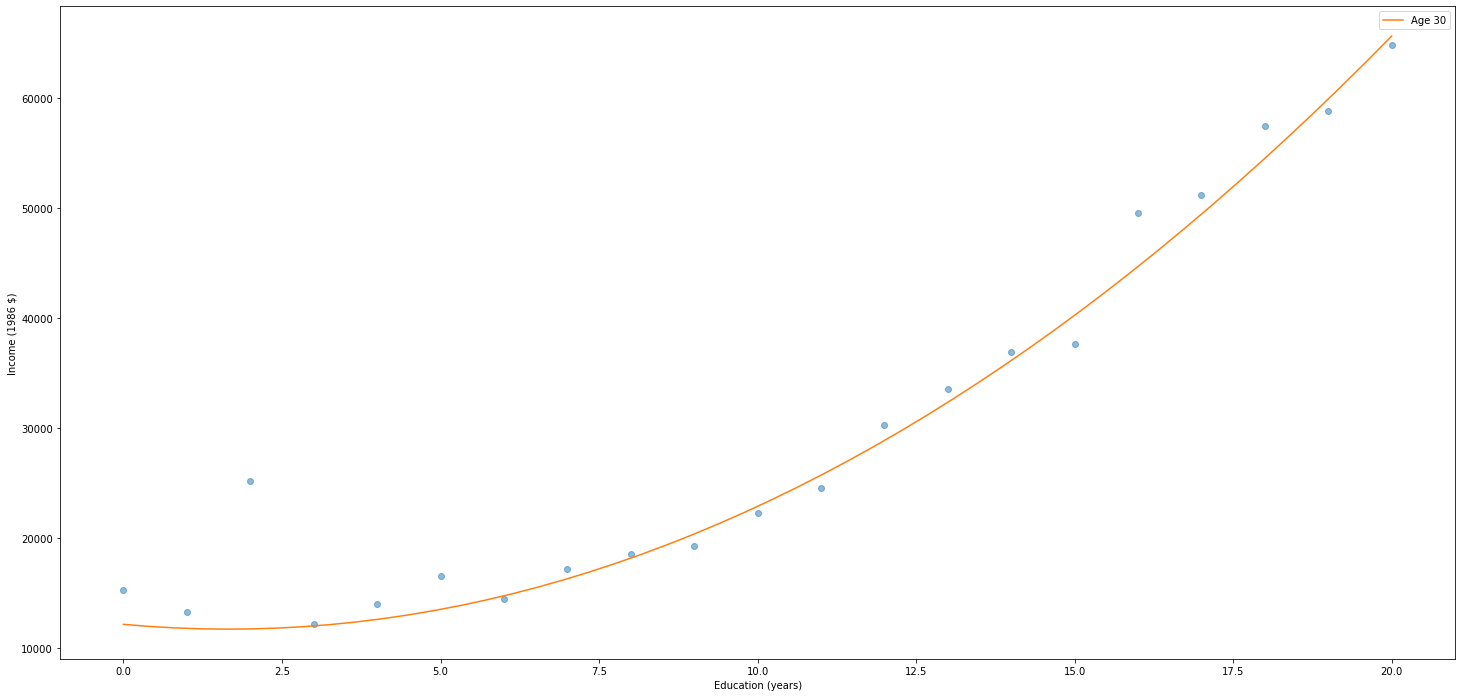

In [161]:
# Plot mean income in each age group
plt.clf()
grouped = gss.groupby('educ')
mean_income_by_educ = grouped['realinc'].mean()

plt.plot(mean_income_by_educ, 'o', alpha=0.5)

# Plot the predictions
plt.plot(df['educ'], pred, label='Age 30')

# Label axes
plt.xlabel('Education (years)')
plt.ylabel('Income (1986 $)')
plt.legend()
plt.show()



<div class="alert alert-block alert-warning">
<b>4.6 Predicting a binary variable

   





</b> 

</div>

Let's use logistic regression to predict a binary variable. Specifically, we'll use age, sex, and education level to predict support for legalizing cannabis (marijuana) in the U.S.

In the GSS dataset, the variable grass records the answer to the question "Do you think the use of marijuana should be made legal or not?"

- ##### <font color='navy'> Fill in the parameters of smf.logit() to predict grass using the variables age, age2, educ, and educ2, along with sex as a categorical variable.
    
</font>



In [162]:
# Recode grass
gss['grass'].replace(2, 0, inplace=True)

# Run logistic regression
formula = 'grass ~ age + age2 + educ + educ2 + C(sex)'

results = smf.logit(formula, data=gss).fit()
results.params

Optimization terminated successfully.
         Current function value: 0.588510
         Iterations 6


Intercept     -1.685223
C(sex)[T.2]   -0.384611
age           -0.034756
age2           0.000192
educ           0.221860
educ2         -0.004163
dtype: float64

- ##### <font color='navy'> Add a column called educ and set it to 12 years; then compute a second column, educ2, which is the square of educ.
    
</font>



In [163]:
# Make a DataFrame with a range of ages
df = pd.DataFrame()
df['age'] = np.linspace(18, 89)
df['age2'] = df['age']**2

# Set the education level to 12
df['educ'] = 12
df['educ2'] = df.educ**2

- ##### <font color='navy'> Generate separate predictions for men and women.
    
</font>



In [164]:
# Generate predictions for men and women
df['sex'] = 1
pred1 = results.predict(df)

df['sex'] = 2
pred2 = results.predict(df)

- ##### <font color='navy'> Fill in the missing code to compute the mean of 'grass' for each age group, and then the arguments of plt.plot() to plot pred2 versus df['age'] with the label 'Female'.
    
</font>



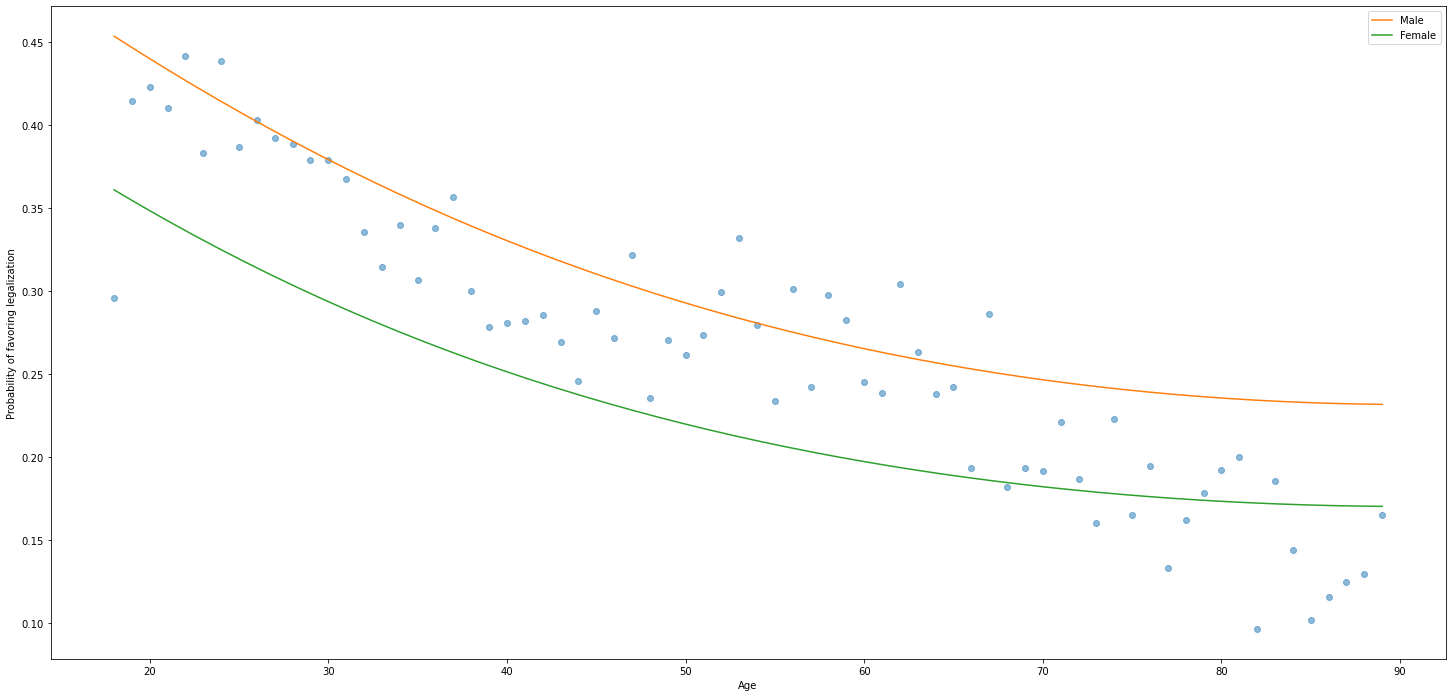

In [166]:
plt.clf()
grouped = gss.groupby('age')
favor_by_age = grouped['grass'].mean()
plt.plot(favor_by_age, 'o', alpha=0.5)

plt.plot(df['age'], pred1, label='Male')
plt.plot(df['age'], pred2, label='Female')

plt.xlabel('Age')
plt.ylabel('Probability of favoring legalization')
plt.legend()
plt.show()

<div class="alert alert-block alert-success">
<b>Outcome: </b> According to the model, as age increases, people are less likely to support legalizing cannabis (marijuana) in the U.S. Men are more likely to support it than women.
</div>